In [1]:
import pandas as pd
import numpy as np
import warnings as ws
import matplotlib.pyplot as plt
import seaborn as sns
ws.filterwarnings("ignore")
print ("All Loaded ==> ")

All Loaded ==> 


In [2]:
df = pd.read_csv("cardata.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
def clean_name(x):
    return x.lower().strip().replace(" ", "_")
df.rename(columns=clean_name, inplace = True)
df.head()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Eda
sns.set()

In [6]:
df.dtypes

car_name          object
year               int64
selling_price    float64
present_price    float64
kms_driven         int64
fuel_type         object
seller_type       object
transmission      object
owner              int64
dtype: object

In [7]:
df.shape

(301, 9)

In [8]:
df.isna().sum()

car_name         0
year             0
selling_price    0
present_price    0
kms_driven       0
fuel_type        0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
# Sukoon

In [10]:
# Splitting the data 
from sklearn.model_selection import train_test_split
X = df.drop("selling_price", axis = 1)
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [13]:
#Checking catagorical columns 
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [14]:
df.fuel_type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: fuel_type, dtype: int64

In [15]:
df.owner.value_counts()

0    290
1     10
3      1
Name: owner, dtype: int64

In [16]:
df.transmission.value_counts()

Manual       261
Automatic     40
Name: transmission, dtype: int64

In [17]:
df.seller_type.value_counts()

Dealer        195
Individual    106
Name: seller_type, dtype: int64

In [21]:
X_train["fuel_type"] = lb.fit_transform(X_train["fuel_type"])

In [22]:
X_test["fuel_type"] = lb.transform(X_test["fuel_type"]) 

In [26]:
X_train["seller_type"] = X_train["seller_type"].apply(lambda x: 1 if x == "Individual" else 0)

In [27]:
X_test["seller_type"] = X_test["seller_type"].apply(lambda x: 1 if x == "Individual" else 0)

In [29]:
X_train["transmission"] = X_train["transmission"].apply(lambda x: 1 if x == "Manual" else 0)
X_test["transmission"] = X_test["transmission"].apply(lambda x: 1 if x == "Manual" else 0)

In [33]:
X_train = X_train.drop("car_name", axis = 1 )
X_test = X_test.drop("car_name", axis = 1 )

In [34]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test) 

In [35]:
# Fitting Random_Forest model

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=6, random_state=42)
rf.fit(scaled_x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [37]:
y_pred = rf.predict(scaled_x_test)

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error

In [39]:
score = r2_score(y_test, y_pred)

In [40]:
mae = mean_absolute_error(y_test, y_pred)

In [44]:
print("R2 Score is {:22.3f}".format(score))
print("\n")
print("Mean absolute error  is {:10.3f}".format(mae))

R2 Score is                  0.952


Mean absolute error  is      0.662


In [45]:
# extra EDA

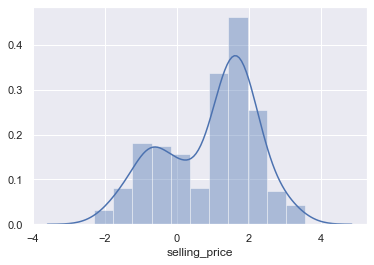

In [48]:
sns.set()
sns.distplot(np.log (df.selling_price))
plt.show()

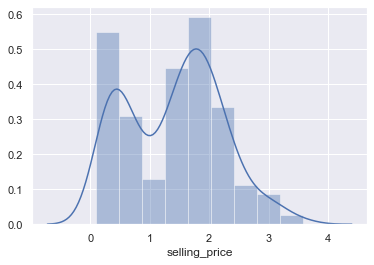

In [49]:
sns.set()
sns.distplot(np.log1p(df.selling_price))
plt.show()